In [11]:
x <- "Hello World"
x

[1] "Hello World"

In [12]:
library(R2jags)
library(MCMCvis)
library(coda)
library(lattice)


In [13]:
jags.mod.coin <- function(){
Y ~ dbin(0.5,10) # our data model
P8 <- ifelse(Y>7,1,0) # the probability of interest
}

In [14]:
jags.mod.fit.coin <- jags(data = list(), model.file = jags.mod.coin,
parameters.to.save = c('Y','P8'),n.chains=1,
DIC=FALSE, n.burnin=0,n.iter = 100)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model



In [15]:
print(jags.mod.fit.coin)


Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp2zXQW5/model219845df4d4.txt", fit using jags,
 1 chains, each with 100 iterations (first 0 discarded)
 n.sims = 100 iterations saved
   mu.vect sd.vect 2.5% 25% 50% 75% 97.5%
P8    0.06   0.239    0   0   0   0     1
Y     4.98   1.583    2   4   5   6     8


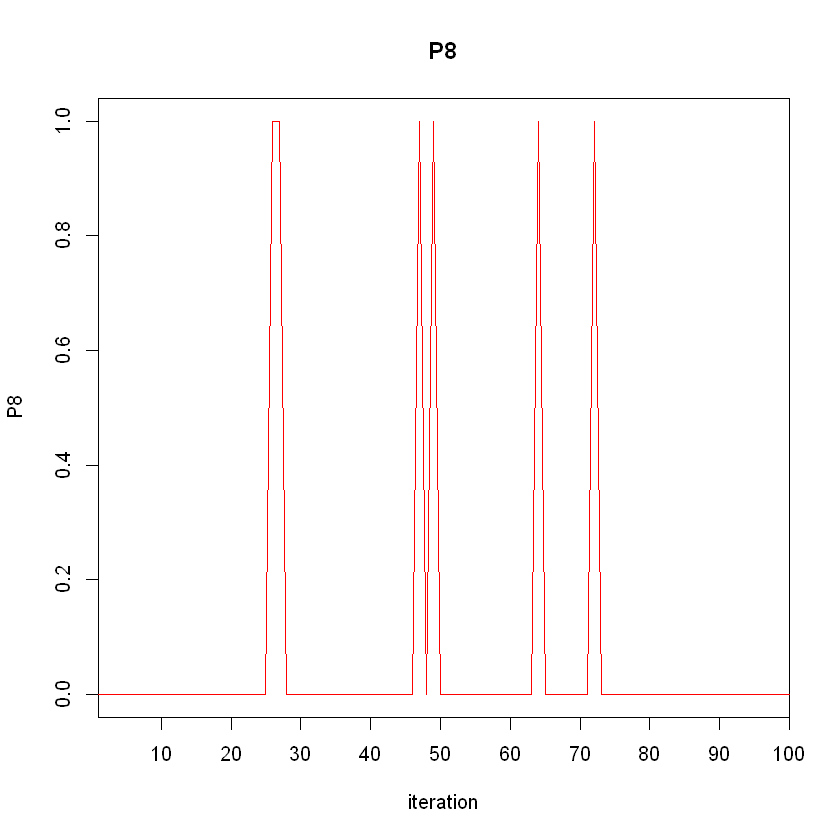

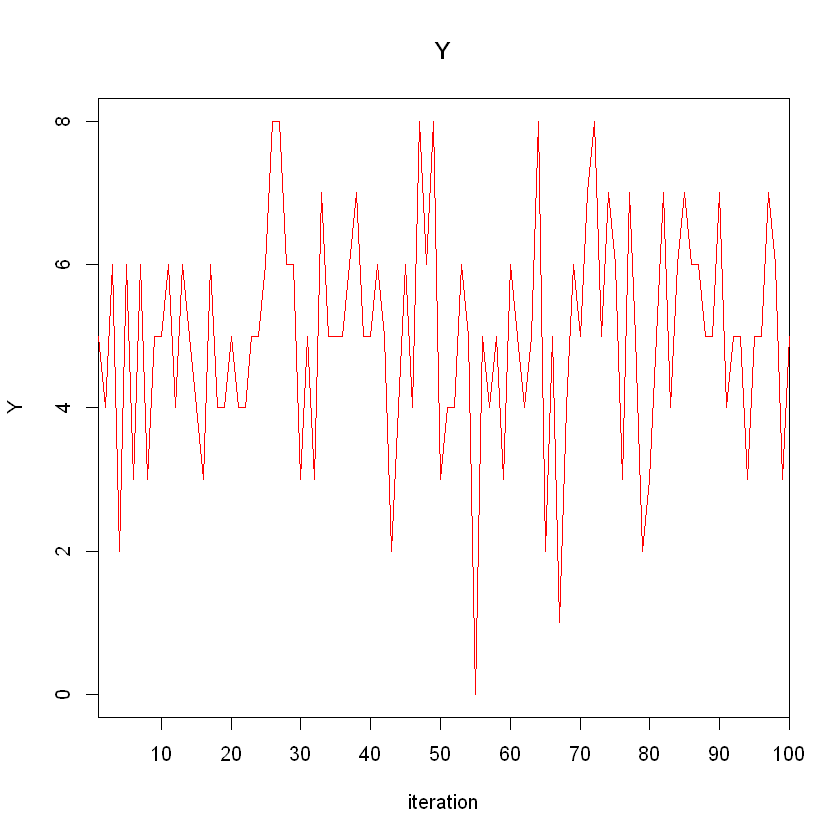

In [16]:
traceplot(jags.mod.fit.coin)

In [17]:
# convert into MCMC object
jagsfit.mcmc.coin <- as.mcmc(jags.mod.fit.coin)
# get numerical summary
summary(jagsfit.mcmc.coin)


Iterations = 1:100
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 100 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean     SD Naive SE Time-series SE
P8 0.06 0.2387  0.02387        0.02387
Y  4.98 1.5826  0.15826        0.15826

2. Quantiles for each variable:

   2.5% 25% 50% 75% 97.5%
P8    0   0   0   0     1
Y     2   4   5   6     8


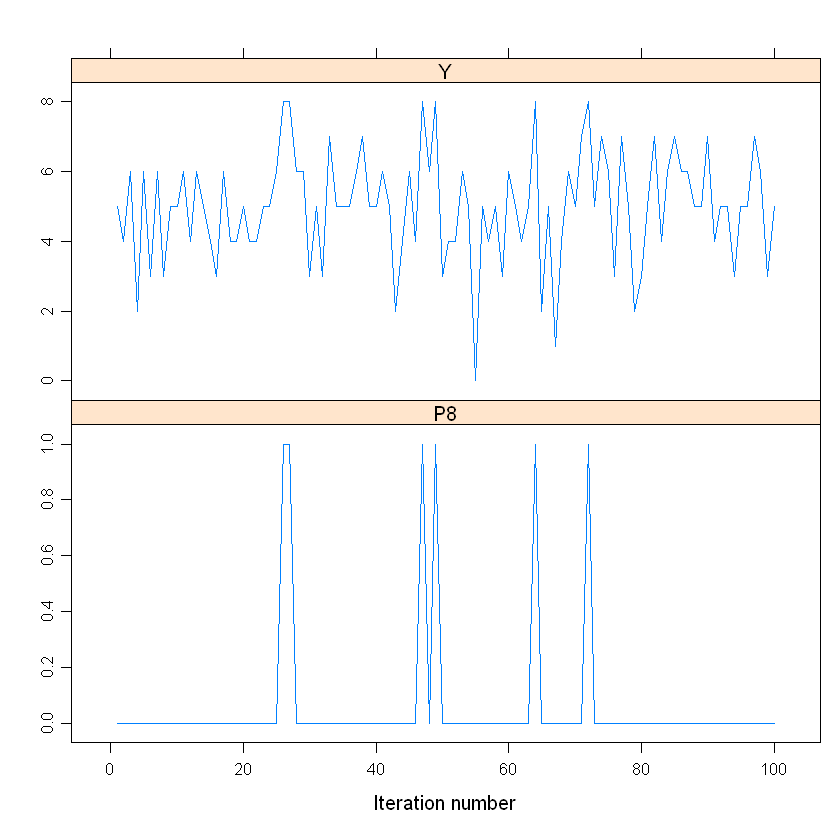

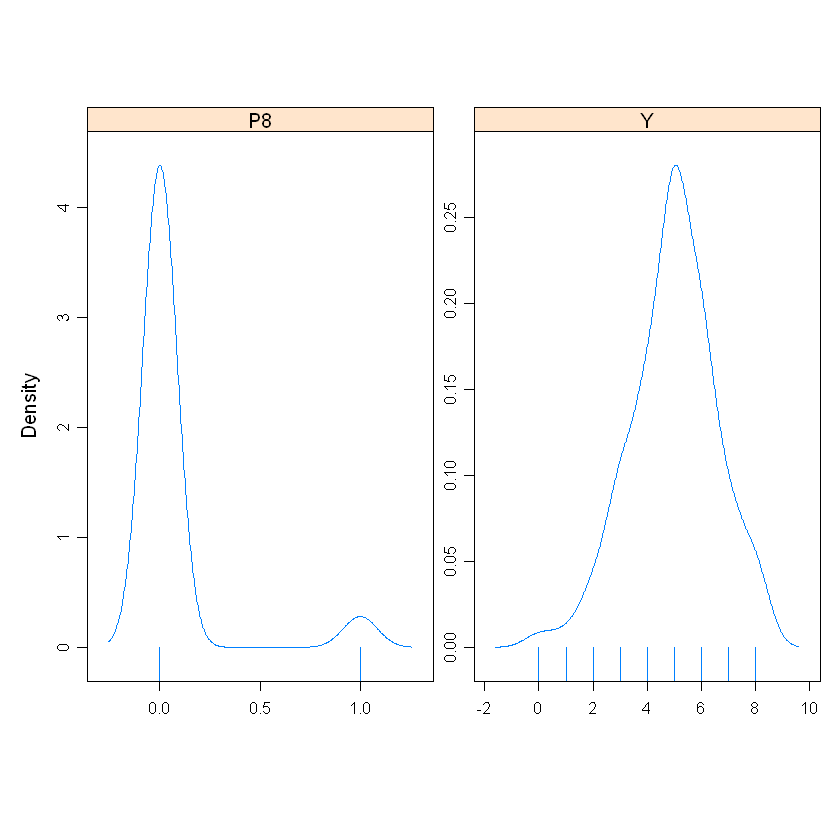

In [18]:
# get traceplots
xyplot(jagsfit.mcmc.coin)
# get density estimate
densityplot(jagsfit.mcmc.coin)

In [19]:
# Drug Trial Code
jags.mod.drug <- function(){
    prior ~ dbeta(9.2,13.8)
    y ~ dbin(prior,20)
    P.crit <- ifelse(y>=15,1,0)
} 
jags.mod.fit.drug <- jags(data = list(),n.iter = 10000,DIC=FALSE,parameters.to.save = c('prior','y','P.crit'),
model.file = jags.mod.drug,n.chains=1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 10

Initializing model



In [20]:
# Drug Trial Code
jags.mod.drug_ques <- function(){
    prior ~ dunif(0,1)
    y ~ dbin(prior,20)
    P.crit <- ifelse(y>=15,1,0)
} 
jags.mod.fit.drug_ques <- jags(data = list(),n.iter = 10000,DIC=FALSE,parameters.to.save = c('prior','y','P.crit'),
model.file = jags.mod.drug_ques,n.chains=1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 8

Initializing model



In [21]:
print(jags.mod.fit.drug_ques) # numerical summaries

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp2zXQW5/model219869fc417b.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
       mu.vect sd.vect  2.5%   25%    50%    75%  97.5%
P.crit   0.291   0.454 0.000 0.000  0.000  1.000  1.000
prior    0.508   0.290 0.028 0.256  0.519  0.756  0.977
y       10.023   6.106 0.000 5.000 10.000 15.000 20.000


Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp2zXQW5/model21987e959e7.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
       mu.vect sd.vect  2.5%   25%   50%    75%  97.5%
P.crit   0.013   0.113 0.000 0.000 0.000  0.000  0.000
prior    0.398   0.099 0.201 0.331 0.394  0.465  0.588
y        7.981   2.847 3.000 6.000 8.000 10.000 14.000


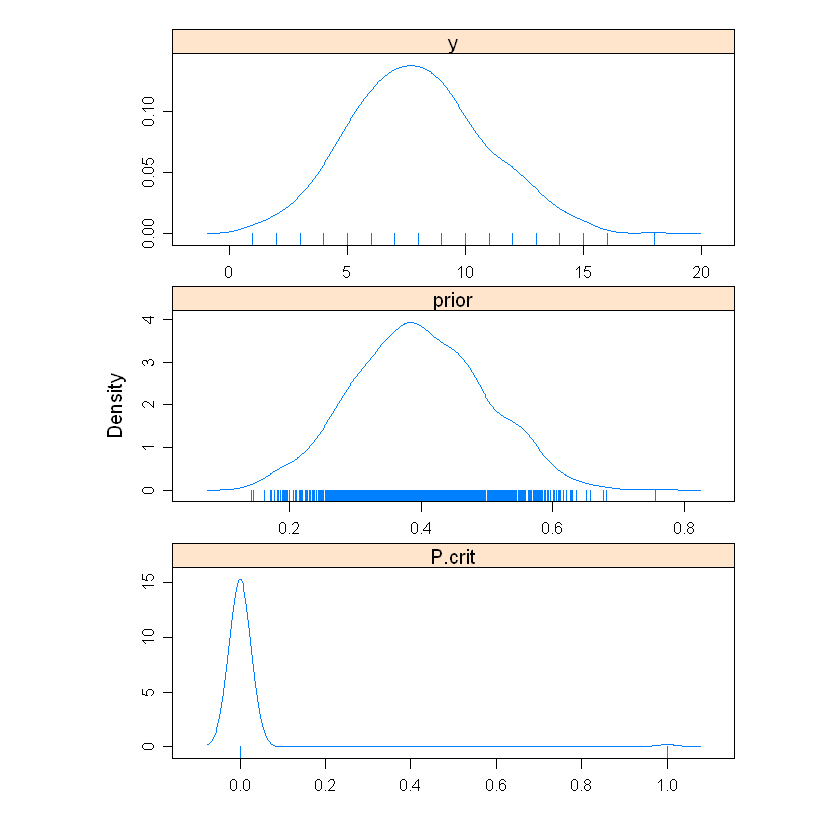

In [22]:
# Look at the outcome
print(jags.mod.fit.drug) # numerical summaries
# traceplots
# traceplot(jags.mod.fit)
# convert into MCMC object for more visualisation tools
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

In [23]:
# drug trial example 2
jags.mod.drug2 <- function(){
    prior ~ dbeta(a,b)
    likelihood ~ dbin(prior,n)
    likelihood.pred ~ dbin(prior,m)
    P.crit <- ifelse(likelihood.pred>=ncrit,1,0)
}

a=9.2 # first parameter of the prior
b=13.8 # second parameter of the prior
r=15 # resoinse (our data)
n=20 # patient number
m=40 # future patient number
ncrit=25 # threshold for future trial
jags.data.drug2 <- list('a','b','r','n','m','ncrit')


jags.mod.fit.drug2 <- jags(data = jags.data.drug2,n.iter=10000,parameters.to.save = c('likelihood','likelihood.pred','P.crit'),
DIC=FALSE,model.file = jags.mod.drug2,n.chains = 1)

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 3
   Total graph size: 12

Initializing model



Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp2zXQW5/model21983dd4512c.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
                mu.vect sd.vect 2.5% 25% 50% 75% 97.5%
P.crit            0.048   0.214    0   0   0   0     1
likelihood        7.987   2.844    3   6   8  10    14
likelihood.pred  15.832   4.912    7  12  15  19    26


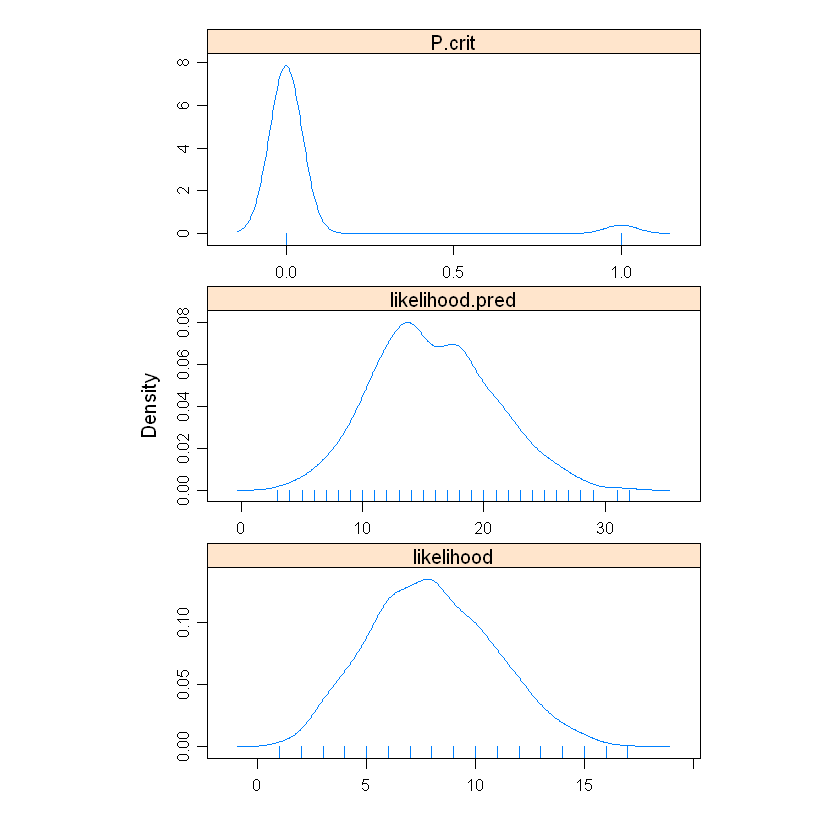

In [24]:
# Look at the outcome
print(jags.mod.fit.drug2) # numerical summaries
# traceplots
# traceplot(jags.mod.fit)
# convert into MCMC object for more visualisation tools
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug2)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

In [25]:
jags.mod.drug2 <- function(){
    prior ~ dbeta(a,b)
    likelihood ~ dbin(prior,n)
    likelihood.pred ~ dbin(prior,m)
    P.crit <- ifelse(likelihood.pred>=ncrit,1,0)
}
# Parameters we want to monitor
jags.param.drug2 <- c('prior','likelihood.pred','P.crit')
# Specify initial values
jags.inits1 <- list('prior' = 0.7, 'likelihood.pred' = 20)
jags.inits2 <- list('prior' = 0.5, 'likelihood.pred' = 28)
jags.inits.drug2 <- list(jags.inits1,jags.inits2)

a=9.2 # first parameter of the prior
b=13.8 # second parameter of the prior
r=15 # resoinse (our data)
n=20 # patient number
m=40 # future patient number
ncrit=25 # threshold for future trial
jags.data.drug2 <- list('a','b','r','n','m','ncrit')


jags.mod.fit.drug2 <- jags(data = jags.data.drug2, inits = jags.inits.drug2,
parameters.to.save = jags.param.drug2, n.chains = 2,DIC=FALSE,
n.iter = 10000, model.file = jags.mod.drug2)


Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 3
   Total graph size: 12

Initializing model



In [26]:
print(jags.mod.fit.drug2)

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp2zXQW5/model21984d1d5113.txt", fit using jags,
 2 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 2000 iterations saved
                mu.vect sd.vect  2.5%    25%    50%    75%  97.5%  Rhat n.eff
P.crit            0.045   0.207 0.000  0.000  0.000  0.000  1.000 1.001  2000
likelihood.pred  15.772   4.901 7.000 12.000 16.000 19.000 26.000 1.005  2000
prior             0.395   0.100 0.211  0.324  0.393  0.465  0.599 1.001  2000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).


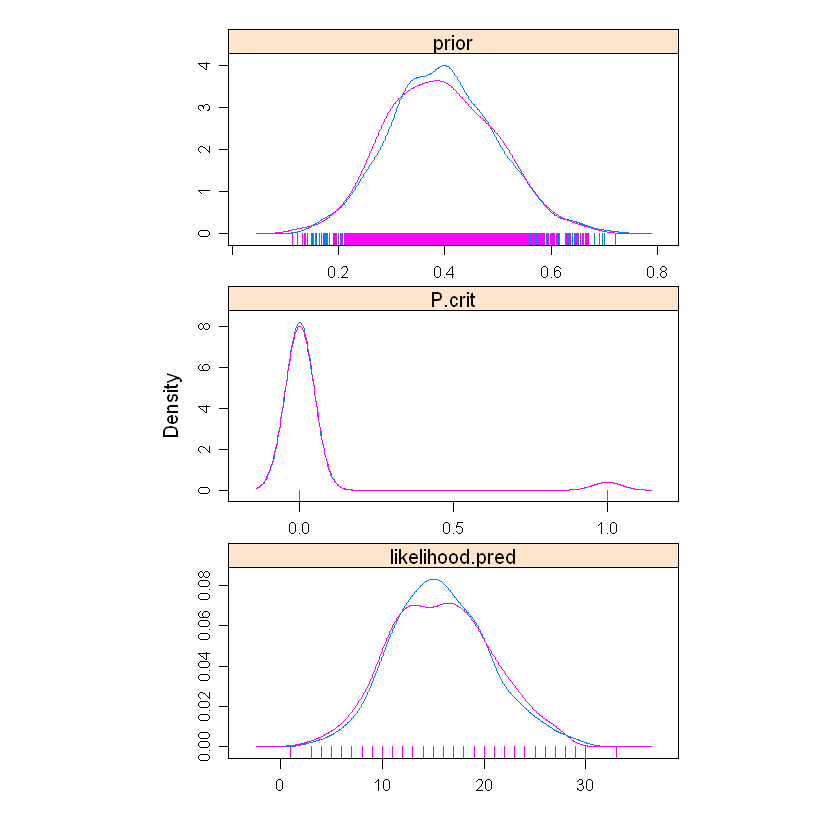

In [27]:
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug2)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 4

Initializing model

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp2zXQW5/model2198346e34d8.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
            mu.vect  sd.vect   2.5%      25%      50%      75%    97.5%
likelihood 51586.82 70047.93 40.950 6051.500 26905.50 69677.75 226183.2
prior      51587.88 70047.55 47.687 5987.218 26931.94 69391.70 226038.3


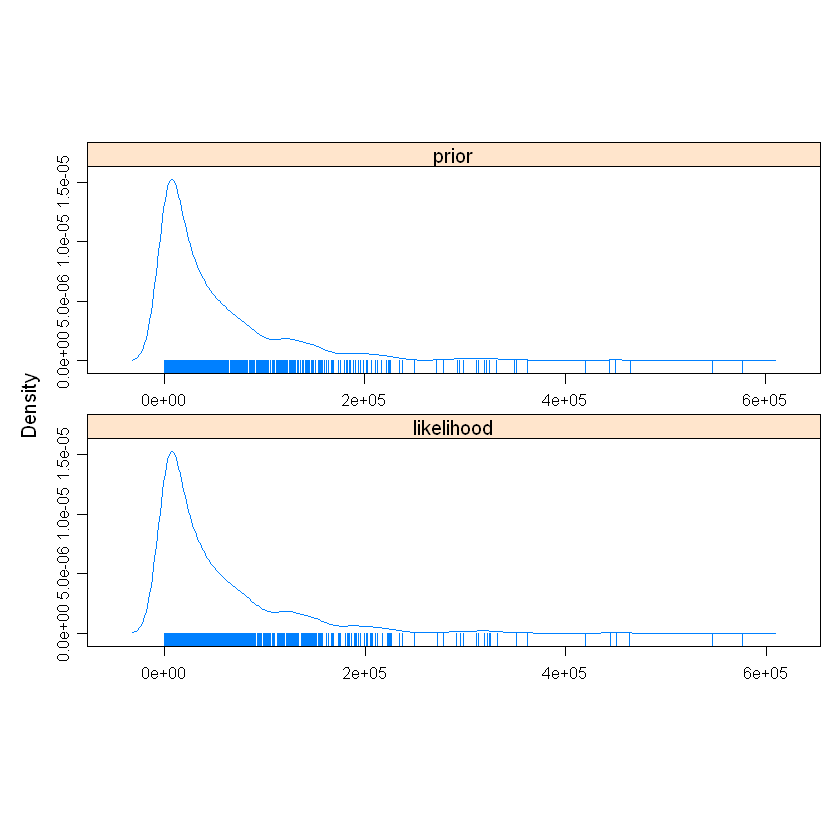

In [34]:
# question on flying bomb
jags.mod.flyingbomb <- function(){
    prior ~ dgamma(0.5,0.00001)
    likelihood ~ dpois(prior)
}
jags.mod.fit.flyingbomb <- jags(data=list(),n.iter=10000,parameters.to.save = c('prior','likelihood'),
model.file=jags.mod.flyingbomb,n.chains = 1,DIC=FALSE)

print(jags.mod.fit.flyingbomb)
jagsfit.mcmc.flyingbomb <- as.mcmc(jags.mod.fit.flyingbomb)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.flyingbomb)